### Runner Data: An Analysis for Multi-Variable Linear Regression

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm

### Output Description

| Expected 5k value | Level of Recommendation |
| :---------------: | :--: | 
| 45 Minutes - 2700S| 1   |
| 40 Minutes - 2400S| 2   |
| 35 Minutes - 2100S| 3   |
| 30 Minutes - 1800S| 4   |
| 28 Minutes - 1680S| 5   |
| 26 Minutes - 1560S| 6   |
| 24 Minutes - 1440S| 7   |
| 22 Minutes - 1320S| 8   |
| 20 Minutes - 1200S| 9   |


### Input Description


List of features
- Gender
- Age
- 5k Time



#### Import Data

In [127]:
data = pd.read_csv("../runner_data/marathon_results_2015.csv")



print(df.head())

   Age  M/F   5K label
0   25    1  883     9
1   30    1  883     9
2   29    1  883     9
3   28    1  883     9
4   32    1  883     9


#### Transform 5k times to label

In [128]:
df = data[['Age', 'M/F', '5K']].copy()
def fix_label(time):
    try:
      
        (h, m, s) = time.split(':')
        (h,m,s) = int(h), int(m), int(s)
       
        if m<=20:
            return 9
        if m<=22:
            return 8 
        if m<=24:
            return 7
        if m<=26:
            return 6
        if m<=28:
            return 5
        if m<=30:
            return 4
        if m<=35:
            return 3
        if m<= 40:
            return 2
        if m<= 45:
            return 1
    except:
        return "NaN"
    
def fix_time(time):
    try:
        (h, m, s) = time.split(':')
        (h,m,s) = int(h), int(m), int(s)
        return h*3600+m*60+s
    except:
        return "NaN"

df['label']= df['5K'].apply(fix_label)
df['5K'] = df['5K'].apply(fix_time)

print(df.head())


   Age M/F   5K label
0   25   M  883     9
1   30   M  883     9
2   29   M  883     9
3   28   M  883     9
4   32   M  883     9


#### Analyze the data for linearity

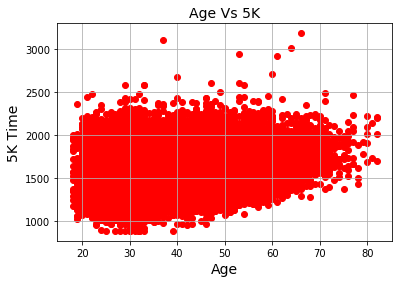

In [129]:
plt.scatter(df['Age'], df['5K'], color='red')
plt.title('Age Vs 5K', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.ylabel('5K Time', fontsize=14)
plt.grid(True)
plt.show()

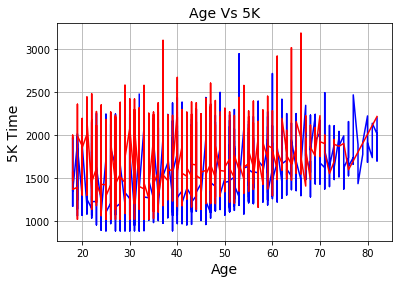

In [130]:
maleTimes = df.loc[df['M/F'] == "M"]
maleTimes = maleTimes.sort_values(by=['Age'])

femaleTimes = df.loc[df['M/F'] == "F"]
femaleTimes = femaleTimes.sort_values(by="Age")
plt.plot(maleTimes["Age"], maleTimes['5K'], color='blue')
plt.plot(femaleTimes["Age"], femaleTimes['5K'], color='red')
plt.title('Age Vs 5K', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.ylabel('5K Time', fontsize=14)
plt.grid(True)
plt.show()

#### More data filtering (gender and NaN)

In [131]:
def fix_age(age):
    if age == 'M':
        return 1
    else:
        return 0
df['M/F'] = df['M/F'].apply(fix_age)

df = df.dropna(axis=0,how='any')

In [163]:


X = df[['Age','M/F','5K']].values
X = X.astype(float)
X = [x for x in X if not np.any(np.isnan(x))]

Y = df[['label']].values
Y = Y.astype(float)
Y = [y for y in Y if not np.any(np.isnan(y))]
for vals in X:
    if np.any(np.isnan(vals)):
        print(vals)

  


# with sklearn

regr = linear_model.LinearRegression()
regr.fit(X, Y)

# print('Intercept: \n', regr.intercept_)
# print('Coefficients: \n', regr.coef_)


#prediction with sklearn
new_age = 
new_gender = 0
new_5k = 1800
print ('Predicted Stock Index Price: \n', regr.predict([[new_age , new_gender, new_5k]]))


# with statsmodels
# X = sm.add_constant(X) # adding a constant
 
# model = sm.OLS(Y, X).fit()
# predictions = model.predict(X) 
 
# print_model = model.summary()
# print(print_model)

Predicted Stock Index Price: 
 [[4.24305731]]
